In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from scipy.stats import chi2_contingency
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder,StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
%matplotlib inline
sns.set_theme(color_codes=True,style='darkgrid',palette='deep',font='sans-serif')

In [3]:
df=pd.read_csv(r"D:\Training Data.csv")

In [4]:
df.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Id                 252000 non-null  int64 
 1   Income             252000 non-null  int64 
 2   Age                252000 non-null  int64 
 3   Experience         252000 non-null  int64 
 4   Married/Single     252000 non-null  object
 5   House_Ownership    252000 non-null  object
 6   Car_Ownership      252000 non-null  object
 7   Profession         252000 non-null  object
 8   CITY               252000 non-null  object
 9   STATE              252000 non-null  object
 10  CURRENT_JOB_YRS    252000 non-null  int64 
 11  CURRENT_HOUSE_YRS  252000 non-null  int64 
 12  Risk_Flag          252000 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 25.0+ MB


In [6]:
df.describe()

,Id,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
count,252000.000000,2.520000e+05,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000
mean,126000.500000,4.997117e+06,49.954071,10.084437,6.333877,11.997794,0.123000
std,72746.278255,2.878311e+06,17.063855,6.002590,3.647053,1.399037,0.328438
min,1.000000,1.031000e+04,21.000000,0.000000,0.000000,10.000000,0.000000
25%,63000.750000,2.503015e+06,35.000000,5.000000,3.000000,11.000000,0.000000
50%,126000.500000,5.000694e+06,50.000000,10.000000,6.000000,12.000000,0.000000
75%,189000.250000,7.477502e+06,65.000000,15.000000,9.000000,13.000000,0.000000
max,252000.000000,9.999938e+06,79.000000,20.000000,14.000000,14.000000,1.000000


In [7]:
df.isnull().sum()

Id                   0
Income               0
Age                  0
Experience           0
Married/Single       0
House_Ownership      0
Car_Ownership        0
Profession           0
CITY                 0
STATE                0
CURRENT_JOB_YRS      0
CURRENT_HOUSE_YRS    0
Risk_Flag            0
dtype: int64

C:\Conda dist\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


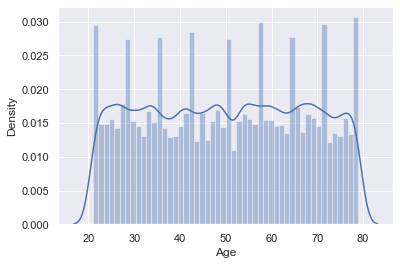

In [8]:
sns.distplot(a=df['Age']);

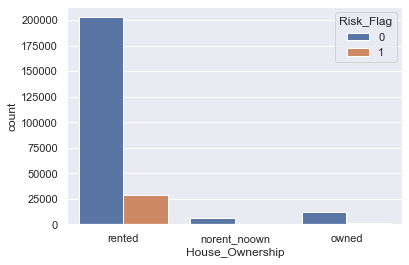

In [9]:
sns.countplot(x='House_Ownership',hue='Risk_Flag',data=df);

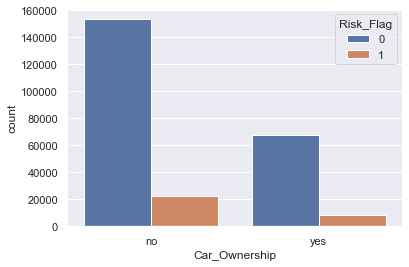

In [10]:
sns.countplot(x='Car_Ownership',hue='Risk_Flag',data=df);

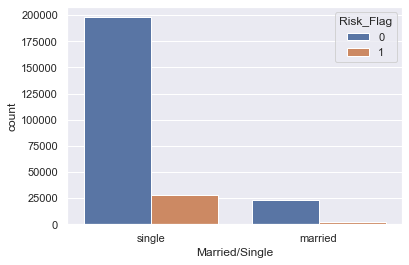

In [11]:
sns.countplot(x='Married/Single',hue='Risk_Flag',data=df);

C:\Conda dist\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


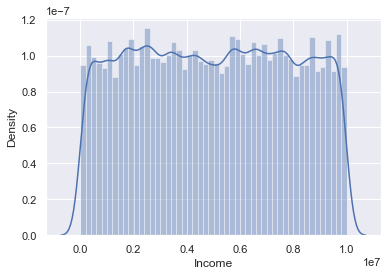

In [12]:
sns.distplot(a=df['Income']);

C:\Users\SMFL-20531\AppData\Local\Temp\ipykernel_16972\1448551465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,cmap='coolwarm');


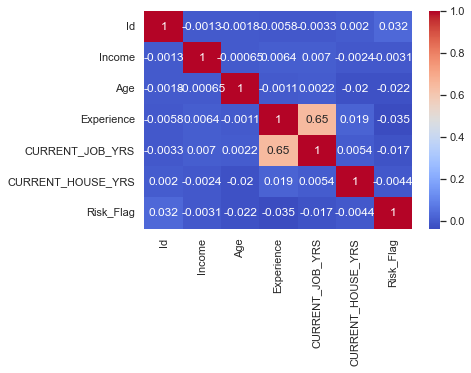

In [13]:
sns.heatmap(df.corr(),annot=True,cmap='coolwarm');

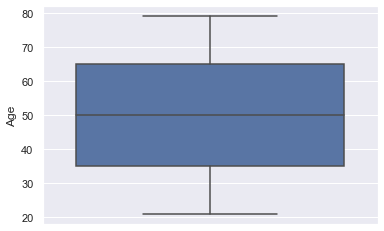

In [14]:
sns.boxplot(y='Age',data=df);

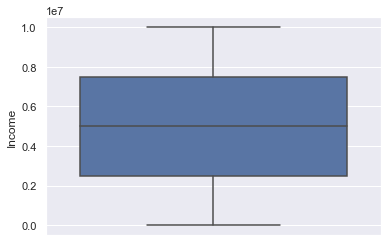

In [15]:
sns.boxplot(y="Income",data=df);

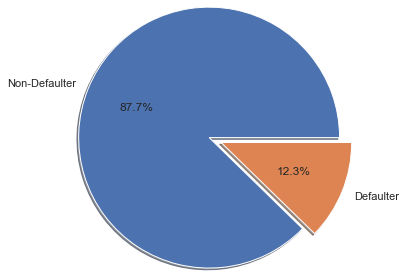

In [16]:
r=df.groupby('Risk_Flag')['Risk_Flag'].count()
plt.pie(r,explode=[0.05,0.1],labels=['Non-Defaulter','Defaulter'],radius=1.5,autopct='%1.1f%%',shadow=True);

In [17]:
print(len(df.Profession.unique()))
print(len(df.STATE.unique()))
print(len(df.CITY.unique()))

51
29
317


# Feature Engineering
Helping function for hypothesis testing

In [18]:
def chi_square_test(data):
    stat,p,dof,expected=chi2_contingency(data)
    alpha=0.05
    print('p value is ' + str(p))
    if p <= alpha:
        print("Dependent (reject HO)")
    else:
        print("independent (HO holds True)")

In [19]:
car_ownership_riskflag=pd.crosstab(df['Car_Ownership'],df['Risk_Flag'])
car_ownership_riskflag

Risk_Flag,0,1
Car_Ownership,,
no,153439,22561
yes,67565,8435


In [20]:
chi_square_test(car_ownership_riskflag)

p value is 1.7350853850183746e-33
Dependent (reject HO)


In [21]:
mariterialstatus_riskflag=pd.crosstab(df['Married/Single'],df['Risk_Flag'])
mariterialstatus_riskflag

Risk_Flag,0,1
Married/Single,,
married,23092,2636
single,197912,28360


In [22]:
chi_square_test(mariterialstatus_riskflag)

p value is 3.773053705715196e-26
Dependent (reject HO)


In [23]:
houseownership_riskflag=pd.crosstab(df['House_Ownership'],df['Risk_Flag'])
houseownership_riskflag

Risk_Flag,0,1
House_Ownership,,
norent_noown,6469,715
owned,11758,1160
rented,202777,29121


In [24]:
chi_square_test(houseownership_riskflag)

p value is 1.8381930028370595e-40
Dependent (reject HO)


# Performing Principal Component Analysis on CURRENT_JOB_YRS and Experience

In [25]:
features=['CURRENT_JOB_YRS','Experience']
df_for_pca=df[features]
scaled_df_for_pca=(df_for_pca - df_for_pca.mean(axis=0))/df_for_pca.std()
scaled_df_for_pca

,CURRENT_JOB_YRS,Experience
0,-0.914129,-1.180230
1,0.731035,-0.014067
2,-0.639935,-1.013635
3,-1.188323,-1.346825
4,-0.914129,0.152528
...,...,...
251995,-0.091547,0.485718
251996,-0.091547,-0.014067
251997,0.182647,-0.513851
251998,-1.736711,-1.680014


In [26]:
pca=PCA()
df_pca=pca.fit_transform(scaled_df_for_pca)
component_names=[f"PC{i+1}" for i in range (df_pca.shape[1])]
df_pca=pd.DataFrame(df_pca,columns=component_names)
df_pca.head()


,PC1,PC2
0,-1.480935,-0.188162
1,0.506973,-0.526866
2,-1.169251,-0.264246
3,-1.792620,-0.112078
4,-0.538533,0.754240


In [27]:
df1=pd.concat([df,df_pca],axis=1)
df1

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag,PC1,PC2
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0,-1.480935,-0.188162
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0,0.506973,-0.526866
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0,-1.169251,-0.264246
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1,-1.792620,-0.112078
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1,-0.538533,0.754240
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251995,251996,8154883,43,13,single,rented,no,Surgeon,Kolkata,West_Bengal,6,11,0,0.278721,0.408188
251996,251997,2843572,26,10,single,rented,no,Army_officer,Rewa,Madhya_Pradesh,6,11,0,-0.074680,0.054787
251997,251998,4522448,46,7,single,rented,no,Design_Engineer,Kalyan-Dombivli,Maharashtra,7,12,0,-0.234197,-0.492498
251998,251999,6507128,45,0,single,rented,no,Graphic_Designer,Pondicherry,Puducherry,0,10,0,-2.415990,0.040091


# Label encoding for categorical variables

In [28]:
features=['Married/Single','Car_Ownership','Profession','CITY','STATE']
lable_encoder=LabelEncoder()

for col in features:
    df1[col]=lable_encoder.fit_transform(df1[col])

In [29]:
df2=pd.get_dummies(df1,columns=['House_Ownership'])
df2.drop(['Id'],axis=1,inplace=True)

In [30]:
X=df2.drop(['Risk_Flag'],axis=1)
Y=df2['Risk_Flag']

In [31]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=0)

In [32]:
sm=SMOTE(random_state=500)
X_res,Y_res=sm.fit_resample(x_train,y_train)

In [ ]:
#Now the data is ready for implementation of Machine Learning model!!
#Since the target variable is either 0 or 1, So we will use ml models which is suitable for binary classification

In [33]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(max_iter=500000)
lr.fit(X_res,Y_res)
y_pred=lr.predict(x_test)
accuracy=lr.score(x_test,y_test)
accuracy

0.8774867724867725

In [49]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      1.00      0.93     66338
           1       0.00      0.00      0.00      9262

    accuracy                           0.88     75600
   macro avg       0.44      0.50      0.47     75600
weighted avg       0.77      0.88      0.82     75600



C:\Conda dist\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Conda dist\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Conda dist\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [55]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)
model.fit(X_res,Y_res)
y_pred=model.predict(x_test)
accuracy=model.score(x_test,y_test)
accuracy

0.859537037037037

In [53]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.90      0.92     66338
           1       0.44      0.57      0.50      9262

    accuracy                           0.86     75600
   macro avg       0.69      0.73      0.71     75600
weighted avg       0.88      0.86      0.87     75600



In [56]:
#Random forest classification
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(criterion='gini',bootstrap=True,random_state=420)
model.fit(X_res,Y_res)
y_pred=model.predict(x_test)
accuracy=model.score(x_test,y_test)
accuracy

0.8830026455026455

In [59]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.89      0.93     66338
           1       0.51      0.81      0.63      9262

    accuracy                           0.88     75600
   macro avg       0.74      0.85      0.78     75600
weighted avg       0.91      0.88      0.89     75600



In [61]:
#DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier(criterion='entropy',random_state=420)
model.fit(X_res,Y_res)
y_pred=model.predict(x_test)
accuracy=model.score(x_test,y_test)
accuracy

0.8658201058201058

In [62]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.87      0.92     66338
           1       0.47      0.85      0.61      9262

    accuracy                           0.87     75600
   macro avg       0.73      0.86      0.76     75600
weighted avg       0.92      0.87      0.88     75600



In [34]:
#XGBoost
from xgboost import XGBClassifier
model=XGBClassifier(learning_rate=0.1,n_estimators=1000,use_label_encoder=False,random_state=420)
model.fit(X_res,Y_res)
y_pred=model.predict(x_test)
accuracy=model.score(x_test,y_test)
accuracy

C:\Conda dist\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


0.8908862433862433

In [65]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.91      0.94     66338
           1       0.54      0.78      0.64      9262

    accuracy                           0.89     75600
   macro avg       0.75      0.84      0.79     75600
weighted avg       0.91      0.89      0.90     75600



In [36]:
import shap
explainer = shap.Explainer(model.predict(x_test))
shap_values = explainer(x_test[0, :])
shap.plots.waterfall(shap_values)

TypeError: The passed model is not callable and cannot be analyzed directly with the given masker! Model: [0 0 0 ... 0 0 0]

Conclusion
XGBoost is the best suitable model for our dataset with accuracy 89%, Alternatively Random Forest and Extra Tree Classifier can also consider, since they gives accuracy of 88%.